# <b>LOGISTIC REGRESSION</b>

In [1]:
#is used to analyze relationship between a (0 or 1)dichotomous dependent variable and 
#categorical or numerical independent variables
#it belongs to a class of models known as GLM(generalized linear model)
#classifaction model
#binary output


STEPS OF PERFORMING LOGISTIC REGRESSION:-

In [2]:
#1)importing libraraies
#2)Data read
#3)Data definition
#4)EDA
#5)Data processing
#6)Splitting data into training and testing set
#7)Training
#8)Testing
#9)Evaluation

<b>Step 1:-</b>IMPORTING LIBRARIES

In [3]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<b>Step 2:-</b>DATA READING

In [4]:
#we have csv file ,in zip file
#name of csv file is "framingham.csv" and zip file is "Heart Disease.zip"
import zipfile
with zipfile.ZipFile("Heart Disease.zip",'r') as z:
       with z.open("framingham.csv") as f:
          data=pd.read_csv(f,header=0)

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<b>Step 3:-</b>DATA DEFINITION...<br>
<b><u>Variables :</u></b><br> 
<b>*sex:</b> male or female;(Nominal)<br>
<b>*age:</b> age of the patient<br>
<b>*currentSmoker:</b> whether or not the patient is a current smoker (Nominal) <br>
<b>*cigsPerDay:</b> the number of cigarettes that the person smoked on average in one day. <br>
<b><u>Medical( history):</u></b><br>
<b>*BPMeds:</b> whether or not the patient was on blood pressure medication (Nominal) <br>
<b>*prevalentStroke:</b> whether or not the patient had previously had a stroke (Nominal) <br>
<b>*prevalentHyp:</b> whether or not the patient was hypertensive (Nominal) <br>
<b>*diabetes:</b> whether or not the patient had diabetes (Nominal) <br>
<b><u>Medical(current):</u></b><br>
<b>*totChol:</b> total cholesterol level (Continuous) <br>
<b>*sysBP:</b> systolic blood pressure (Continuous) <br>
<b>*diaBP:</b> diastolic blood pressure (Continuous) <br>
<b>*BMI:</b> Body Mass Index (Continuous) <br>
<b>*heartRate:</b> heart rate (Continuous) <br>
<b>*glucose:</b> glucose level (Continuous) <br>
<b><u>Predict variable (desired target):</u></b><br>
10 year risk of coronary heart disease CHD (binary: “1”, 
means “Yes”, “0” means “No”)<br>

<b>Step 4:-</b>EXPLORATORY DATA ANALYSIS

In [6]:
#getting the overview of data of its columns and their dtype,null values and names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#how many null values are in each column
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#total entries of each column
data.isnull().count()

male               4238
age                4238
education          4238
currentSmoker      4238
cigsPerDay         4238
BPMeds             4238
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4238
sysBP              4238
diaBP              4238
BMI                4238
heartRate          4238
glucose            4238
TenYearCHD         4238
dtype: int64

In [9]:
#percentage of having null value of each column 
data_missing=round((data.isnull().sum()/data.isnull().count())*100,1)
data_missing.sort_values(ascending=True).head(16)#sort values(percentage) in ascending order

male               0.0
age                0.0
currentSmoker      0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
sysBP              0.0
diaBP              0.0
heartRate          0.0
TenYearCHD         0.0
BMI                0.4
cigsPerDay         0.7
totChol            1.2
BPMeds             1.3
education          2.5
glucose            9.2
dtype: float64

<Axes: >

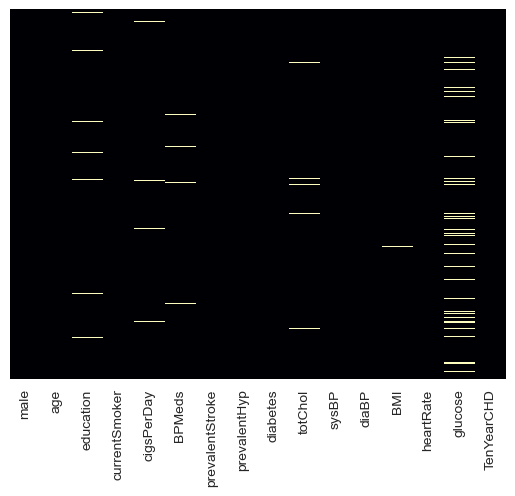

In [10]:
#show the no. of null values 
sns.heatmap(data=data.isnull(),yticklabels=False,
           cbar=False,cmap='magma',annot=False)

<Axes: xlabel='TenYearCHD', ylabel='count'>

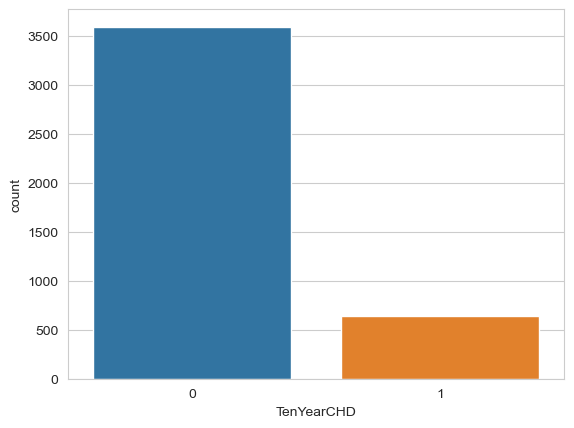

In [11]:
#this will show that which and how much the risk of having heart disease
#result is having heart disease is less chance than having it.
sns.countplot(x='TenYearCHD',data=data)

<Axes: xlabel='TenYearCHD', ylabel='count'>

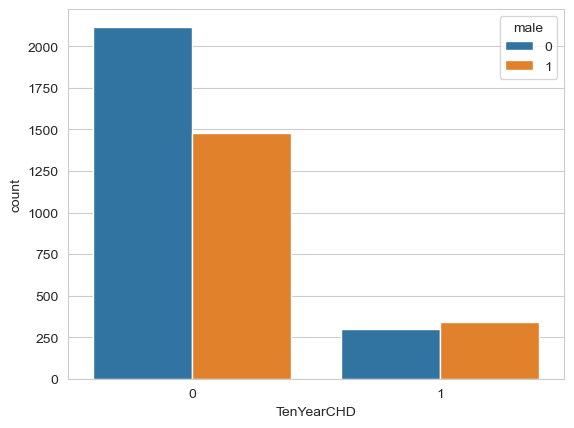

In [12]:
#this show that in male  heart disease is high than female 
sns.countplot(x='TenYearCHD',hue='male',data=data)

<Axes: xlabel='TenYearCHD', ylabel='count'>

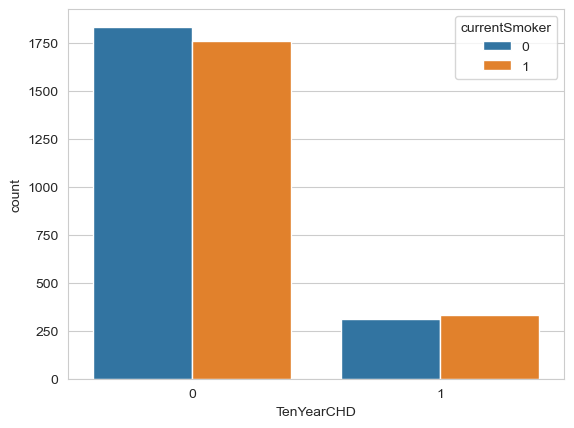

In [13]:
#effect of smoking on ten year CHD
sns.countplot(x='TenYearCHD',hue='currentSmoker',data=data)

<b>Step 5:-</b>DATA PROCESSING

In [14]:
#according to gender,average glucose level 
round(data[['male','glucose']].groupby('male').mean())

,glucose
male,
0,82.0
1,82.0


In [19]:
#fill the null values in glucose column by 82 which is average glucose level
data['glucose'].fillna(82,inplace=True)
data['glucose'].head(20)

0      77.0
1      76.0
2      70.0
3     103.0
4      85.0
5      99.0
6      85.0
7      78.0
8      79.0
9      88.0
10     76.0
11     61.0
12     64.0
13     84.0
14     82.0
15     70.0
16     72.0
17     89.0
18     78.0
19     65.0
Name: glucose, dtype: float64

In [20]:
#according to gender,average cigeratte per day 
round(data[['male','cigsPerDay']].groupby('male').mean())

,cigsPerDay
male,
0,6.0
1,13.0


In [21]:
#define a function which is used to fill null values of cigsPerDay column with its average value
def  impute_cigs(cig_sex):
    male=cig_sex[0]
    cigsPerDay=cig_sex[1]
    if pd.isnull(cigsPerDay):
        if male==1:
            return 13
        else:
            return 6
    else:
        return cigsPerDay

In [22]:
#call function using apply method to fill null values
data['cigsPerDay']=data[['male','cigsPerDay']].apply(impute_cigs,axis=1)
data['cigsPerDay']


0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4233     1.0
4234    43.0
4235    20.0
4236    15.0
4237     0.0
Name: cigsPerDay, Length: 4238, dtype: float64

In [23]:
#acc. to gender,find average BMI value
round(data[['male','BMI']].groupby('male').mean())

,BMI
male,
0,26.0
1,26.0


In [24]:
#fill null values of BMI ,with its average value
data['BMI'].fillna(value=data['BMI'].mean(),inplace=True)

<Axes: >

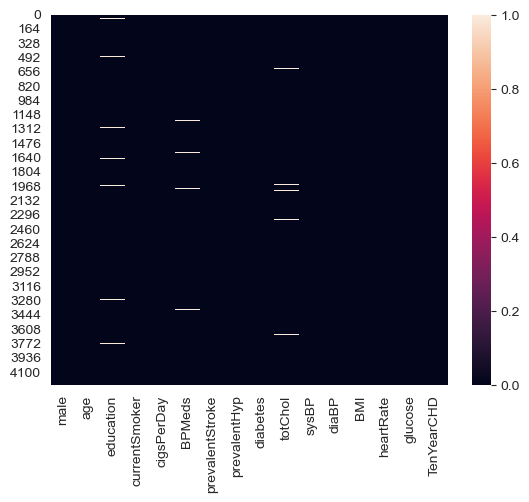

In [25]:
#now,have a look at presence of null values in each column
sns.heatmap(data=data.isnull())

In [27]:
#here,education column has  no role to predict TenYearCHD so we drop it.
data.drop(['education'],inplace=True,axis=1)

In [28]:
#acc. to gender,average BPMeds value
round(data[['male','BPMeds']].groupby('male').mean())

,BPMeds
male,
0,0.0
1,0.0


In [29]:
#fill null values of BPMeds with its average value which is 0
data['BPMeds'].fillna(0,inplace=True)

<Axes: >

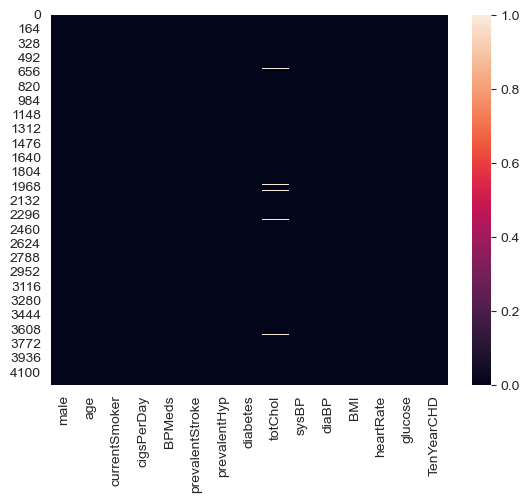

In [30]:
#acc. to heatmap,only totChol ahs some null values
sns.heatmap(data=data.isnull())

In [31]:
#average totChol value
round(data['totChol'].mean())

237

In [32]:
#fill NaN with its average value
data['totChol'].fillna(value=round(data['totChol'].mean()),inplace=True)

<Axes: >

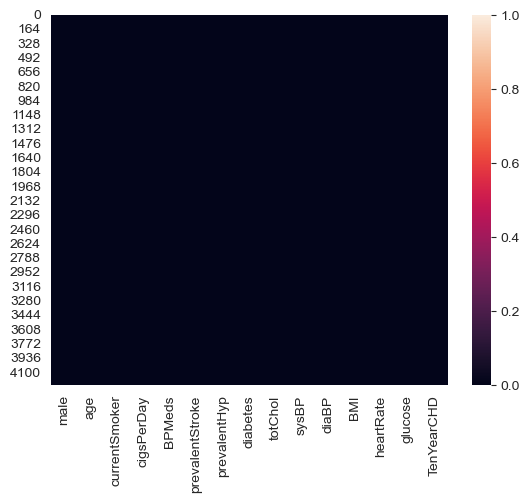

In [33]:
#data cleaning is done ,there is no null value
sns.heatmap(data=data.isnull())

<b>Step 6:-</b>SPLITTING DATA

In [71]:
#TenYearCHD is the predict variable so it becomes 'y' and remaining columns are 'x' 
x=data.drop(['TenYearCHD'],axis=1)
y=data['TenYearCHD']

In [74]:
#import train_test_split function to split 'data-->x and y' into testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y
                                              ,test_size=0.33,random_state=42)
#percentage of test set is 33%.

In [75]:
#training input
X_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3674,0,69,0,0.0,1.0,0,1,0,203.0,166.0,90.0,25.40,77.0,80.0
3394,0,57,1,9.0,0.0,0,0,0,382.0,140.0,94.0,21.20,98.0,70.0
3054,0,57,1,20.0,1.0,0,1,0,315.0,193.0,109.0,27.99,70.0,74.0
3714,1,53,0,0.0,0.0,0,1,0,198.0,142.5,82.0,23.84,57.0,78.0
3839,1,63,0,0.0,0.0,0,1,1,260.0,155.5,98.0,30.08,67.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,0,58,1,2.0,0.0,0,0,0,271.0,146.0,92.0,23.07,75.0,83.0
466,0,57,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.0
3093,1,40,0,0.0,0.0,0,1,0,192.0,141.5,108.5,36.01,76.0,78.0
3773,1,50,1,30.0,0.0,0,0,0,196.0,131.0,80.0,20.42,108.0,82.0


In [76]:
#testing input
X_test

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3189,0,49,0,0.0,0.0,0,0,0,165.0,120.0,66.5,21.45,71.0,74.0
765,1,50,1,9.0,0.0,0,0,0,296.0,119.0,90.0,23.55,75.0,69.0
3265,0,40,1,43.0,0.0,0,0,0,224.0,106.0,72.0,23.59,82.0,71.0
1968,0,52,1,9.0,0.0,0,0,0,249.0,112.0,75.0,22.54,72.0,71.0
2186,0,51,1,20.0,0.0,0,1,0,293.0,151.0,92.0,30.67,80.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,1,64,0,0.0,0.0,0,0,0,263.0,102.5,63.5,28.82,64.0,99.0
4212,1,48,1,43.0,0.0,0,1,0,209.0,144.0,88.0,29.11,84.0,60.0
3423,1,52,0,0.0,0.0,0,1,0,220.0,151.0,102.0,25.82,95.0,85.0
3704,1,42,0,0.0,0.0,0,0,0,186.0,134.0,86.5,25.71,88.0,92.0


In [77]:
#training output
Y_train

3674    0
3394    0
3054    0
3714    1
3839    1
       ..
3445    1
466     0
3093    0
3773    0
861     0
Name: TenYearCHD, Length: 2838, dtype: int64

In [78]:
#testing output
Y_test

3189    0
765     1
3265    0
1968    1
2186    0
       ..
3966    0
4212    0
3423    0
3704    0
1937    0
Name: TenYearCHD, Length: 1399, dtype: int64

In [51]:
#to remove all null values if anyone remains
data.dropna(inplace=True)

In [52]:
#it will show is there any null value or not
data.isnull()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
#import LogisticRegression function to fit the model
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()

In [80]:
#fit model with training data
logR.fit(x_train,y_train)

LogisticRegression()

<b>Step 8:-</b>TESTING

In [81]:
#test the data...predict values of y by giving x_test as input
predictions=logR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

***ACCURACY***

In [83]:
#import accuracy_score function used to check accuracy level of predicted value with observed values
from sklearn.metrics import accuracy_score
perf=accuracy_score(Y_test,predictions)
perf*100#show result as percentage

85.06075768406004

<b>Step 9:-</b>EVALUATION

In [84]:
#import metrics used to create cunfusion matrix
from sklearn import metrics

In [86]:
#this will result a matrix which shows us that where errors are made
#rows represent actual outcomes and columns represent prediction we made.
cm=metrics.confusion_matrix(Y_test,predictions)
cm
#here 1179 and 11,are correct guess/prediction and 3 is type1 error and 206 is type2 error

array([[1179,    3],
       [ 206,   11]], dtype=int64)

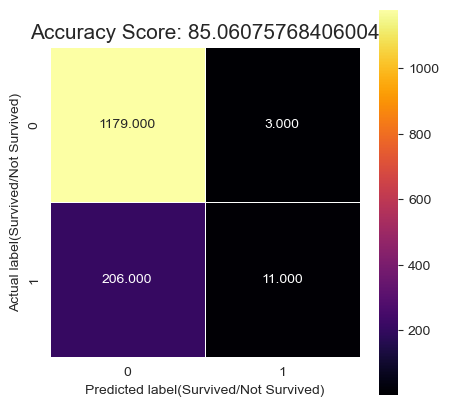

In [88]:
#confusion matrix plotting where accuracy level ,confusion matrix values are shown
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(Survived/Not Survived)');
plt.xlabel('Predicted label(Survived/Not Survived)');
all_sample_title = 'Accuracy Score: {0}'.format(perf*100)
plt.title(all_sample_title, size = 15);